In [21]:
import networkx as nx
import numpy as np
import requests
import zipfile
from io import BytesIO
import json

In [22]:
with open('../config/political_etl.json') as fh:
    political_etl_config = json.load(fh)

In [23]:
political_etl_config

{'link_dir': 'http://www-personal.umich.edu/~mejn/netdata/polblogs.zip',
 'temp_dir': 'data/political/temp/',
 'data_dir': 'data/political/raw/',
 'raw_data_filename': 'polblogs.gml',
 'temp_pickle_graph_filename': 'political_graph.pickle',
 'ground_truth_filename': 'ground_truth.json'}

In [24]:
## GET LOADED AND UNZIPPED ONLY CODE
link = "http://www-personal.umich.edu/~mejn/netdata/polblogs.zip"
data_dir = "data/political/raw/"

In [25]:
# Split URL to get the file name
filename = link.split('/')[-1]

In [26]:
# Downloading the file by sending the request to the URL
print('Beginning Political Data Download')
req = requests.get(link)
print('Political Data Download Completed')

Beginning Political Data Download
Political Data Download Completed


In [31]:
# extracting the zip file contents
zf= zipfile.ZipFile(BytesIO(req.content))
zf.extractall('../' + data_dir)

In [32]:
#editing file for proper readin

In [33]:
f = open('../' + data_dir + political_etl_config["raw_data_filename"], "r")
contents = f.readlines()
f.close()

In [34]:
contents[:5]

['Creator "Lada Adamic on Tue Aug 15 2006"\n',
 'graph [\n',
 '  directed 1\n',
 '  node [\n',
 '    id 1\n']

In [35]:
missing_line = '  multigraph 1\n'
contents.insert(3, missing_line)
contents[:5]

['Creator "Lada Adamic on Tue Aug 15 2006"\n',
 'graph [\n',
 '  directed 1\n',
 '  multigraph 1\n',
 '  node [\n']

In [36]:

f = open('../' + data_dir + political_etl_config["raw_data_filename"], "w")
contents = "".join(contents)
f.write(contents)
f.close()

In [37]:
for web in H.nodes:
    print(web, H.nodes[web])


100monkeystyping.com {'value': 0, 'source': 'Blogarama'}
12thharmonic.com/wordpress {'value': 0, 'source': 'BlogCatalog'}
40ozblog.blogspot.com {'value': 0, 'source': 'Blogarama,BlogCatalog'}
4lina.tblog.com {'value': 0, 'source': 'Blogarama'}
750volts.blogspot.com {'value': 0, 'source': 'Blogarama'}
95theses.blogspot.com {'value': 0, 'source': 'Blogarama'}
abbadabbaduo.blogspot.com {'value': 0, 'source': 'Blogarama,LeftyDirectory'}
aboutpolitics.blogspot.com {'value': 0, 'source': 'Blogarama,eTalkingHead'}
achingandspinning.blogspot.com {'value': 0, 'source': 'Blogarama'}
ackackack.com {'value': 0, 'source': 'BlogCatalog'}
adamtalib.blogspot.com {'value': 0, 'source': 'Blogarama'}
adviceforlefty.blogspot.com {'value': 0, 'source': 'Blogarama,BlogCatalog,CampaignLine'}
agonist.org {'value': 0, 'source': 'LeftyDirectory'}
aintnobaddude.com {'value': 0, 'source': 'LeftyDirectory,CampaignLine'}
ajbenjaminjr.blogspot.com {'value': 0, 'source': 'LabeledManually'}
alicublog.blogspot.com {'va

In [54]:
for i in H.nodes:
    print(H.nodes[i]['value'], i)

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184
0 18

In [41]:
G = nx.read_gml('../' + data_dir + political_etl_config["raw_data_filename"], label='id')

In [46]:
H = G.to_undirected()

In [47]:
G,H

(<networkx.classes.multidigraph.MultiDiGraph at 0x7fa228706d00>,
 <networkx.classes.multigraph.MultiGraph at 0x7fa22a7e8a90>)

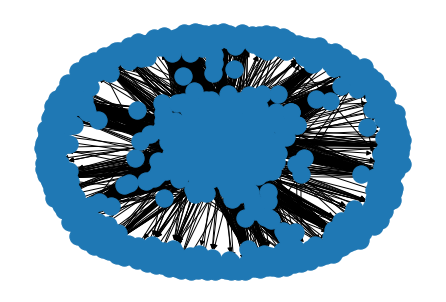

In [38]:
nx.draw(G)

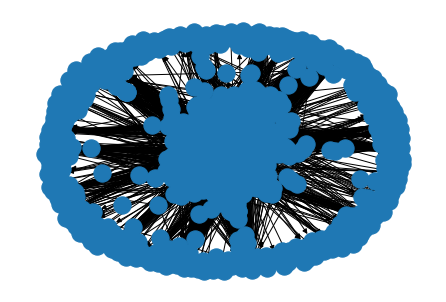

In [44]:
nx.draw(H)

In [50]:
largest = max(nx.connected_components(H), key=len)

In [51]:
Largest_SCC = G.subgraph(largest)

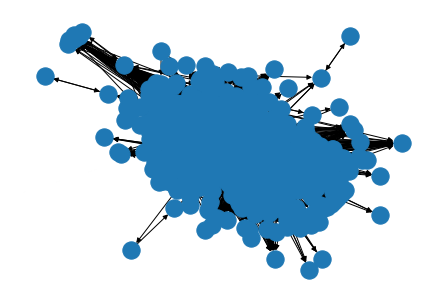

In [17]:
nx.draw(Largest_SCC)

In [ ]:
G = nx.read_gml(data_dir + raw_data_filename, label='id')
H = G.to_undirected()
largest = max(nx.connected_components(H), key=len)
largest_SCC = G.subgraph(largest)

In [18]:
def spectral_cluster(G):
    A = nx.to_numpy_array(G)
    D = np.diag(A.sum(axis=1))
    # graph laplacian
    L = D-A
    # eigenvalues and eigenvectors
    vals, vecs = np.linalg.eig(L)
    # sort these based on the eigenvalues
    vecs = vecs[:,np.argsort(vals)]
    vals = vals[np.argsort(vals)]
    return [1 if i > 0 else 0 for i in vals]

# Try on entire graph

In [127]:
predictions = spectral_cluster(H)

In [134]:
evaluate = []
index = 0
for i in list(H.nodes(data = True)):
    evaluate.append(predictions[index] == i[1]['value'])
    index += 1

In [136]:
sum(evaluate)/len(evaluate)

0.7778523489932886

# Try on strongest connected component

In [142]:
predictions = spectral_cluster(Largest_SCC)

In [143]:
evaluate = []
index = 0
for i in list(Largest_SCC.nodes(data = True)):
    evaluate.append(predictions[index] == i[1]['value'])
    index += 1

In [144]:
sum(evaluate)/len(evaluate)

0.5586380832282472